In [9]:
#Twitter sentiment analysis for hastags

In [10]:
!pip install pycountry

In [11]:
!pip install langdetect

In [12]:
# Import Libraries

import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Authentication
consumerKey = "################################################"
consumerSecret = "################################################"
accessToken = "################################################"
accessTokenSecret = "################################################"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [16]:
#Sentiment Analysis

def percentage(part, whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword, lang='en').items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print("Tweet : " + tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: trump -filter:retweets
Please enter how many tweets to analyze: 500
Tweet : Brazil's upcoming fire season and drought will likely complicate Covid cases. Amazon, Bird box, Community, credit k… https://t.co/537n9EKiu5
Tweet : @yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz @_Kay_D_Dog Trump won fair and square and people were being losers a… https://t.co/N9AdYWagXa
Tweet : In October 2020 the Trump campaign sought highly sensitive ballot security information from multiple counties in Pe… https://t.co/2vTR7Jx6Io
Tweet : @neriann6 @Melonious_Petty @PaulWal10780283 @SJMcLachlan It’s not Donald trump, it’s the United States constitution. They are a republic.
Tweet : God Will Vindicate President Trump During The Election Turmoil! ( END ) https://t.co/VXKx3DI6tO via @YouTube
Tweet : President Trump kept every single promise he made. He was constantly attacked by the MSM, as well as faced nonstop… https://t.co/nYX3WaMaYU
Tweet : Michael would’ve been T

In [17]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  172
negative number:  162
neutral number:  166


In [18]:
tweet_list

,0
0,Brazil's upcoming fire season and drought will...
1,@yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz...
2,In October 2020 the Trump campaign sought high...
3,@neriann6 @Melonious_Petty @PaulWal10780283 @S...
4,God Will Vindicate President Trump During The ...
...,...
495,It’s hilarious how Trump stans have to defend ...
496,President Trump is proven right once again!!! ...
497,Donald Trump is a stone cold racist and bigot!...
498,"“Instead, the evidence presented more strongly..."


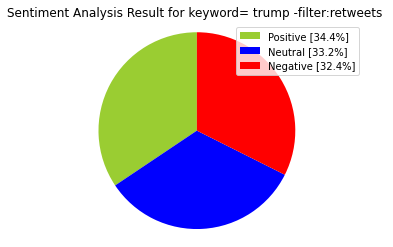

In [19]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= " +keyword + " " )
plt.axis('equal')
plt.show()

In [20]:
tweet_list

,0
0,Brazil's upcoming fire season and drought will...
1,@yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz...
2,In October 2020 the Trump campaign sought high...
3,@neriann6 @Melonious_Petty @PaulWal10780283 @S...
4,God Will Vindicate President Trump During The ...
...,...
495,It’s hilarious how Trump stans have to defend ...
496,President Trump is proven right once again!!! ...
497,Donald Trump is a stone cold racist and bigot!...
498,"“Instead, the evidence presented more strongly..."


In [21]:
tweet_list.drop_duplicates(inplace = True)

In [22]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Brazil's upcoming fire season and drought will...,Brazil's upcoming fire season and drought will...
1,@yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz...,@yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz...
2,In October 2020 the Trump campaign sought high...,In October 2020 the Trump campaign sought high...
3,@neriann6 @Melonious_Petty @PaulWal10780283 @S...,@neriann6 @Melonious_Petty @PaulWal10780283 @S...
4,God Will Vindicate President Trump During The ...,God Will Vindicate President Trump During The ...
...,...,...
495,It’s hilarious how Trump stans have to defend ...,It’s hilarious how Trump stans have to defend ...
496,President Trump is proven right once again!!! ...,President Trump is proven right once again!!! ...
497,Donald Trump is a stone cold racist and bigot!...,Donald Trump is a stone cold racist and bigot!...
498,"“Instead, the evidence presented more strongly...","“Instead, the evidence presented more strongly..."


In [23]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Brazil's upcoming fire season and drought will...,brazil s upcoming fire season and drought will...
1,@yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz...,kay d dog trump won fair and square ...
2,In October 2020 the Trump campaign sought high...,in october 2020 the trump campaign sought high...
3,@neriann6 @Melonious_Petty @PaulWal10780283 @S...,petty it s not donald trump it s the ...
4,God Will Vindicate President Trump During The ...,god will vindicate president trump during the ...
5,President Trump kept every single promise he m...,president trump kept every single promise he m...
6,Michael would’ve been Trump’s VP over Pence an...,michael would ve been trump s vp over pence an...
7,"@MSNBC Only US or Military flags, huh? Wonder...",only us or military flags huh wonder if t...
8,@pares_gabriela @thehill Scared of him? The fi...,gabriela scared of him the first one term...
9,Analysis: This GOP senator is now Enemy No. 1 ...,analysis this gop senator is now enemy no 1 ...


In [24]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Brazil's upcoming fire season and drought will...,brazil s upcoming fire season and drought will...,0.000000,1.000000,positive,0.122,0.660,0.218,0.2263
1,@yoloboyd02 @Nippy2x11 @chiwowies @heyitslenaz...,kay d dog trump won fair and square ...,0.250000,0.550000,positive,0.185,0.489,0.326,0.3818
2,In October 2020 the Trump campaign sought high...,in october 2020 the trump campaign sought high...,0.050000,0.450000,positive,0.000,0.857,0.143,0.3947
3,@neriann6 @Melonious_Petty @PaulWal10780283 @S...,petty it s not donald trump it s the ...,0.000000,0.000000,positive,0.115,0.705,0.179,0.2500
4,God Will Vindicate President Trump During The ...,god will vindicate president trump during the ...,0.000000,0.000000,positive,0.180,0.576,0.245,-0.0258
5,President Trump kept every single promise he m...,president trump kept every single promise he m...,-0.035714,0.273810,positive,0.123,0.697,0.180,0.1027
6,Michael would’ve been Trump’s VP over Pence an...,michael would ve been trump s vp over pence an...,0.400000,0.350000,positive,0.000,0.807,0.193,0.5563
7,"@MSNBC Only US or Military flags, huh? Wonder...",only us or military flags huh wonder if t...,-0.050000,0.550000,neutral,0.000,1.000,0.000,0.0000
8,@pares_gabriela @thehill Scared of him? The fi...,gabriela scared of him the first one term...,0.250000,0.333333,negative,0.234,0.766,0.000,-0.6369
9,Analysis: This GOP senator is now Enemy No. 1 ...,analysis this gop senator is now enemy no 1 ...,0.000000,0.000000,negative,0.363,0.637,0.000,-0.6908


In [27]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [28]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [29]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,179,35.8
negative,168,33.6
neutral,153,30.6


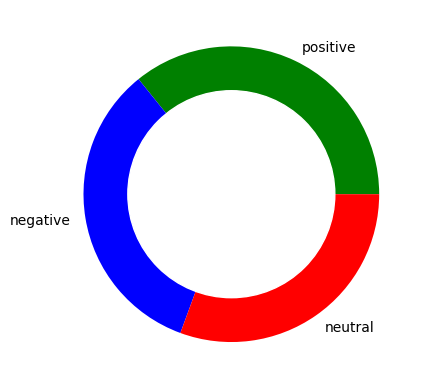

In [30]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [37]:
from google.colab import files
uploaded = files.upload()

Saving cloud.png to cloud.png


In [40]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


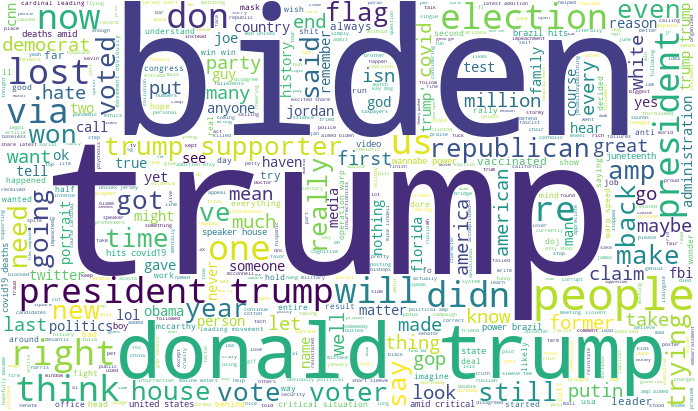

In [41]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


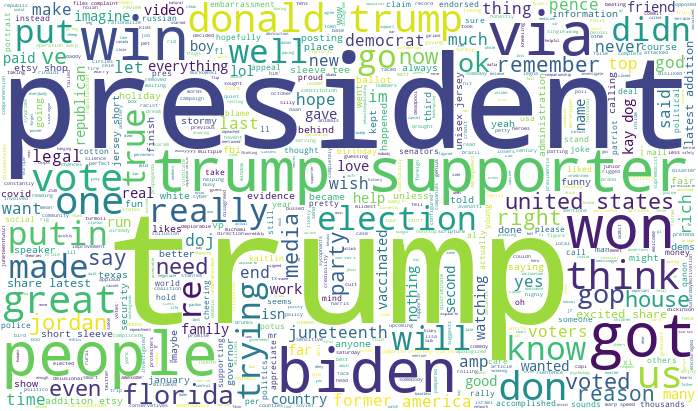

In [42]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


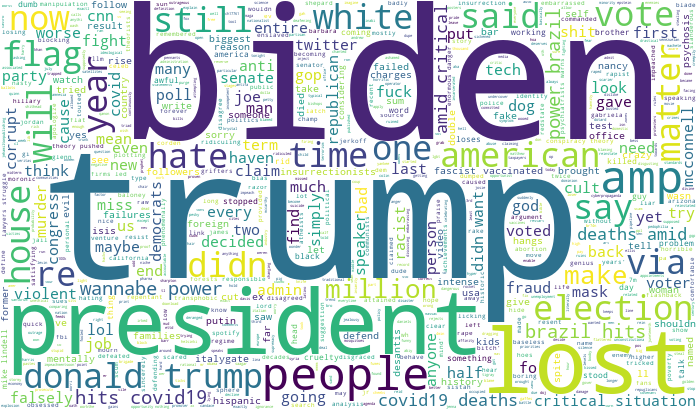

In [43]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


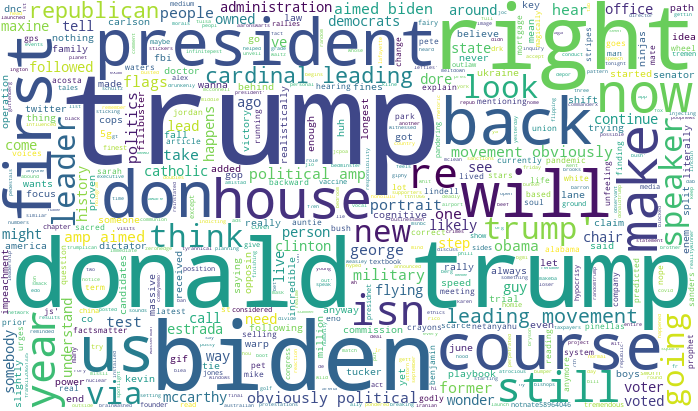

In [44]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)